In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h2 style="color: yellow">
Análise exploratória dos dados
<h2>

Desvio padrão: são os valores que estão disperço, isto é, distante do valor mediano  
o quanto os dados fogem de uma tendência central - a mediana

In [88]:
ratings = pd.read_csv('../data/files/data-science-ratings.csv', sep=',', encoding='utf-8')
movies = pd.read_csv('../data/files/data-science-movies.csv', sep=',', encoding='utf-8')
tmdb = pd.read_csv('../data/files/data_science_tmdb_5000_movies.csv', sep=",", encoding="utf-8")

In [9]:
print(f'Quantidade de linhas e colunas {ratings.shape}')
print(f'Quantidade de dados nulos {ratings.isna().sum().sum()}')
print(ratings.dtypes)
print(ratings.head())

Quantidade de linhas e colunas (100836, 4)
Quantidade de dados nulos 0
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [12]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [143]:
ratings.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
ratings.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [23]:
ratings.nota.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [25]:
ratings.nota.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [30]:
print(f'Média {ratings.nota.mean()}')
print(f'Mediana {ratings.nota.median()}')

Média 3.501556983616962
Mediana 3.5


In [31]:
ratings.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

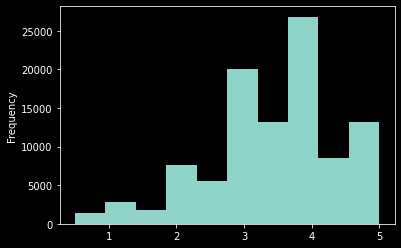

In [29]:
ratings.nota.plot(kind='hist')

c:\Users\rober\Desktop\machine_learning\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


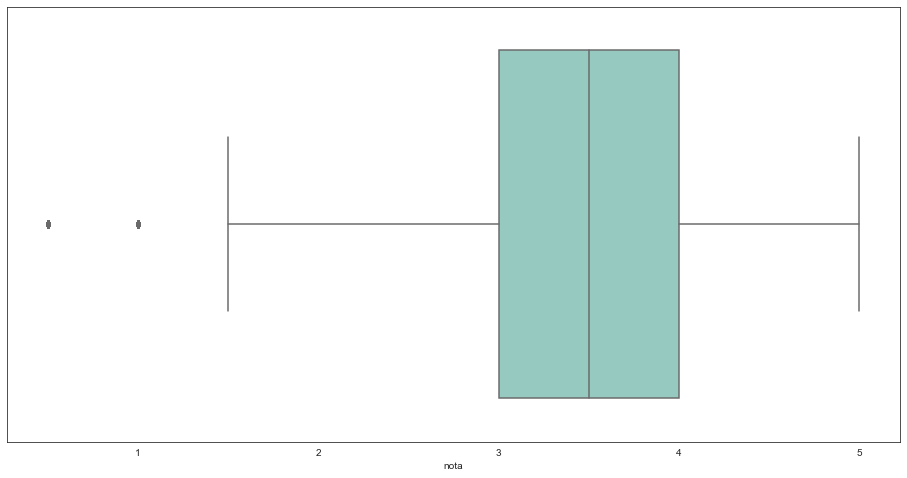

In [84]:
sns.set_style(style='white')
ax =  sns.boxplot(ratings.nota)
ax.figure.set_size_inches(16, 8)

In [44]:
print(f'Quantidade de linhas e colunas {movies.shape}')
print(f'Quantidade de dados nulos {movies.isna().sum().sum()}')
print(movies.dtypes)
print(movies.head())

Quantidade de linhas e colunas (9742, 3)
Quantidade de dados nulos 0
movieId     int64
title      object
genres     object
dtype: object
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [45]:
movies.columns = ['filmeId', 'titulo', 'generos']
movies.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [56]:
print("Média das notas do filme com id 1 => {}".format(round(ratings.query("filmeId == 1").nota.mean(), 2)))

Média das notas do filme com id 1 => 3.92


In [64]:
media_por_filme = ratings.groupby('filmeId').nota.mean()
print('Média das notas de todos os filmes => {}'.format(round(media_por_filme, 2)))

Média das notas de todos os filmes => filmeId
1         3.92
2         3.43
3         3.26
4         2.36
5         3.07
          ... 
193581    4.00
193583    3.50
193585    3.50
193587    3.50
193609    4.00
Name: nota, Length: 9724, dtype: float64


<AxesSubplot:ylabel='Frequency'>

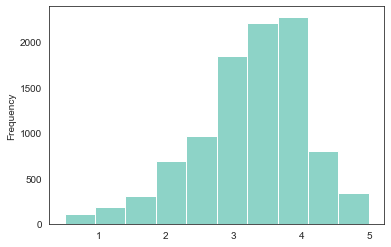

In [65]:
media_por_filme.plot(kind="hist")

c:\Users\rober\Desktop\machine_learning\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


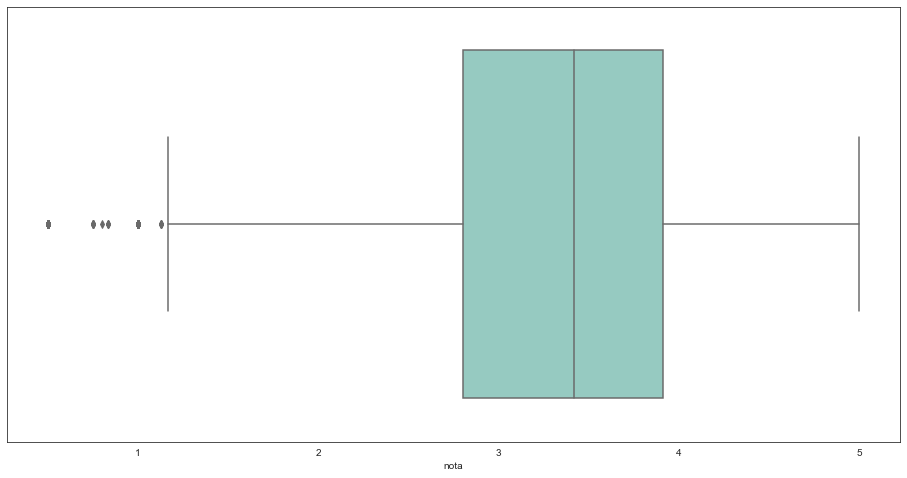

In [83]:
ax = sns.boxplot(media_por_filme)
ax.figure.set_size_inches(16, 8)

c:\Users\rober\Desktop\machine_learning\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.0, 1.0, 'Média por Filme')

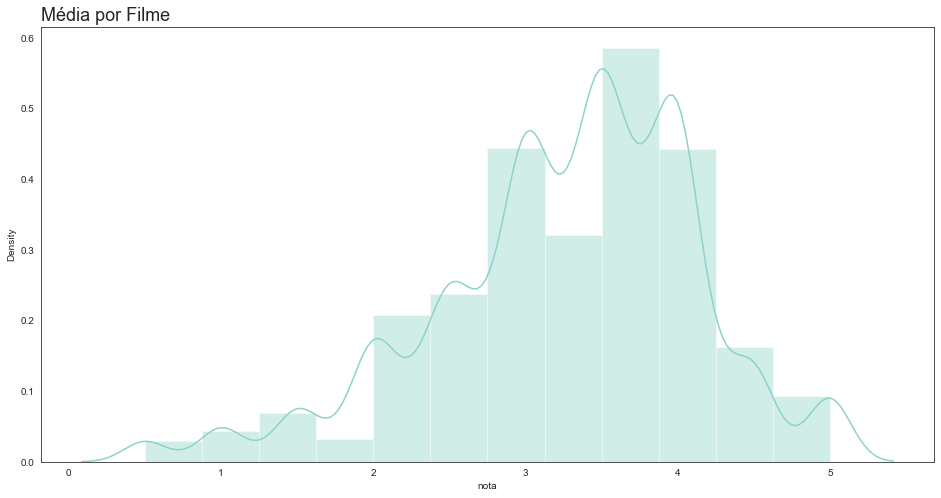

In [87]:
ax = sns.distplot(media_por_filme, bins=12)
ax.figure.set_size_inches(16, 8)
ax.set_title("Média por Filme", fontsize=18, loc="left")

In [90]:
print(f'Quantidade de linhas e colunas {tmdb.shape}')
print(f'Quantidade de dados nulos {tmdb.isna().sum().sum()}')
print(tmdb.dtypes)
print(tmdb.head())

Quantidade de linhas e colunas (4803, 20)
Quantidade de dados nulos 3941
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  25

In [91]:
tmdb.original_language.unique() # categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
# buget => orcamento => quantitativa continuo

In [ ]:
# quantidade de votos => 1, 2, 3, 4 não tem voto 2.5
# notas do movielens => 0.5, 1, 2, 3, ...5 não tem 2.7

In [96]:
tmdb.original_language.value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [97]:
tmdb.original_language.value_counts().to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [98]:
tmdb.original_language.value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


In [99]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<AxesSubplot:xlabel='original_language', ylabel='total'>

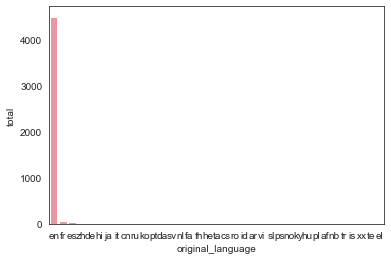

In [101]:
sns.barplot(x="original_language", y="total", data=contagem_de_lingua)


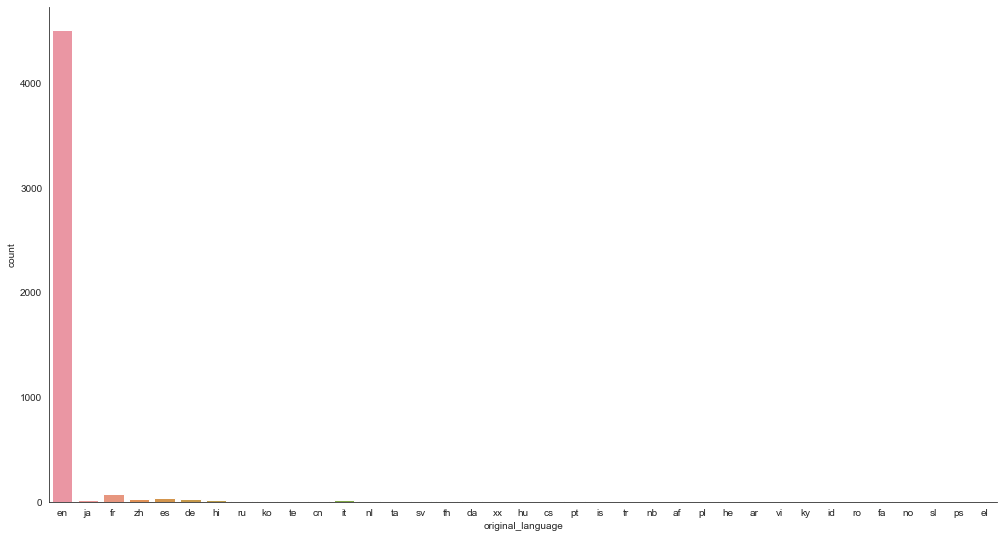

In [103]:
ax = sns.catplot(x="original_language", kind="count", data=tmdb)
ax.figure.set_size_inches(16, 8)


([<matplotlib.patches.Wedge at 0x2d063cd88b0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

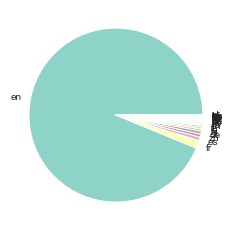

In [105]:
plt.pie(contagem_de_lingua.total, labels=contagem_de_lingua.original_language)

In [108]:
total_por_lingua = tmdb["original_language"].value_counts()
total_de_ingles = total_por_lingua.loc['en']
total_geral = total_por_lingua.sum()
total_do_resto = total_geral - total_de_ingles
print(f"Total de Inglês {total_de_ingles}")
print(f"Total Geral {total_geral}")
print(f"Total do Resto {total_do_resto}")

Total de Inglês 4505
Total Geral 4803
Total do Resto 298


In [111]:
dados = {
  'lingua': ['ingles', 'outros'],
  'total': [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


In [134]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

Text(0.0, 1.0, 'Comparação inglês e outros idiomas')

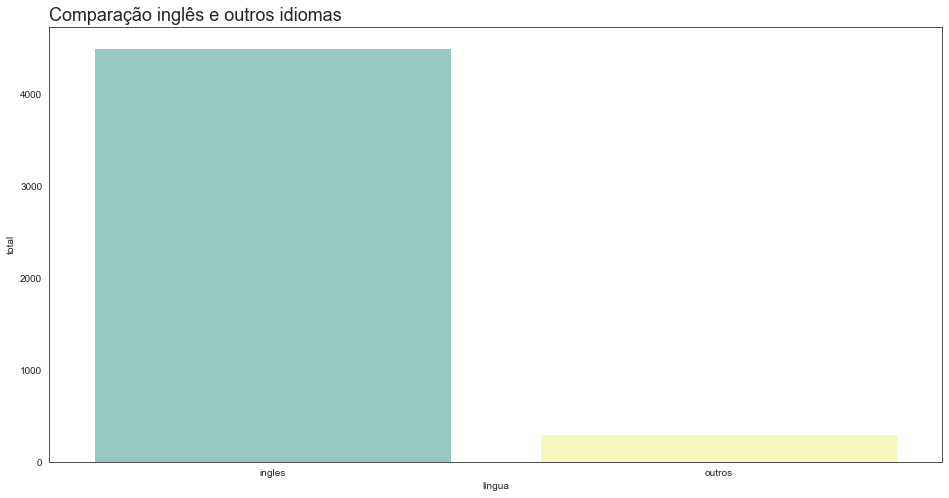

In [114]:
ax = sns.barplot(x='lingua', y="total", data=dados)
ax.figure.set_size_inches(16, 8)
ax.set_title("Comparação inglês e outros idiomas", fontsize=18, loc="left")


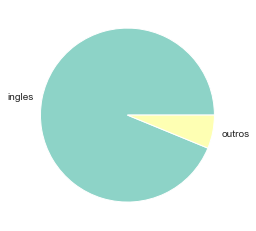

In [118]:
ax = plt.pie(dados["total"], labels=dados["lingua"])

In [127]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

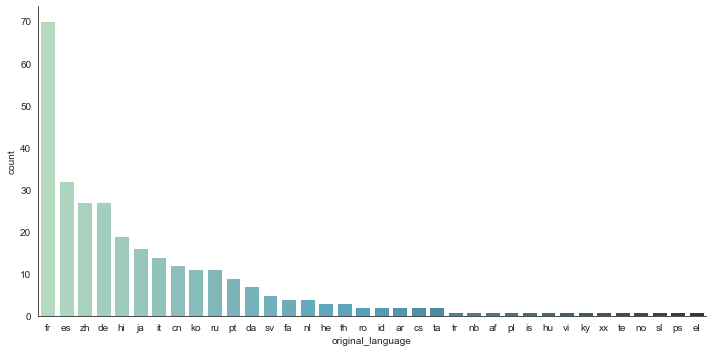

In [139]:
ax = sns.catplot(x="original_language", 
                kind="count", 
                data=filmes_sem_lingua_original_em_ingles, 
                aspect=2, 
                palette="GnBu_d",
                order=total_por_lingua_de_outros_filmes.index)

In [140]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [146]:
notas_do_toy_story = ratings.query("filmeId == 1")
notas_do_jumanji = ratings.query('filmeId == 2')

print(len(notas_do_jumanji), len(notas_do_toy_story))

110 215


In [151]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [152]:
print("Nota mediana do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Nota mediana do Jumanji %.2f" % notas_do_jumanji.nota.median())

Nota mediana do Toy Story 4.00
Nota mediana do Jumanji 3.50


In [160]:
import numpy as np

filme1 = np.append(np.array([2.5] *10), np.array([3.5] *10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [162]:
print(filme1.mean(), filme2.mean())
print(np.median(filme1), np.median(filme2))

3.0 3.0
3.0 3.0


In [170]:
print("Desvio padrão nota do filme jumanji {}".format(notas_do_jumanji.nota.std()))

Desvio padrão nota do filme jumanji 0.8817134921476455


In [171]:
print("Desvio padrão nota do filme toy story {}".format(notas_do_toy_story.nota.std()))

Desvio padrão nota do filme toy story 0.8348591407114047


In [174]:
print("Desvio padrão nota do filme 1 =>  {}".format(filme1.std()))

Desvio padrão nota do filme 1 =>  0.5


In [176]:
print("Desvio padrão nota do filme 2 =>  {}".format(filme2.std()))

Desvio padrão nota do filme 2 =>  2.0
